In [1]:
import numpy as np

In [2]:
from hpolib.benchmarks.ml import conv_net
import time

start = time.time()
b = conv_net.ConvolutionalNeuralNetworkOnCIFAR10()
stop = time.time()
print("data import time: ",stop-start)

ModuleNotFoundError: No module named 'hpolib'

In [1]:
from platform import python_version

print(python_version())

3.6.9


In [16]:
2**5

32

In [6]:


batch_size = 128
num_classes = 10
epochs = 1

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
60000/60000 [============

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import time

class mnist_mlp():
    def __init__(self,max_time=2e-2):
        self.batch_size = 128
        self.learning_rate = 0.001
        self.rho = 0.9
        self.epsilon=1e-07
        self.epochs = 3
        self.samples = 2
        self.max_time = max_time
        
    def train_model(self,X,verbose=0):
        """
        Load Mnist data, creates a nueral network, create an
        optimizer, put all three together and train. Finally
        perform test and return test error.
        """
        batch_size = self.batch_size
        learning_rate = self.learning_rate
        rho = self.rho
        epsilon = self.epsilon
        epochs = self.epochs
        
        if len(X.shape) == 1:
            X = np.array(X).reshape(1,-1)
       
        validation_score = np.zeros((X.shape[0],1))
       
        for index in range(X.shape[0]):
            x = X[index]
            x = np.array(x).reshape(-1)
            x = x.reshape(1,-1)
            print("x",x[:,0][0],x[:,1][0], x[:,2][0], x[:,3][0])
            # Part 1: get the dataset
            (x_train, y_train), (x_test, y_test) = mnist.load_data()
            x_train = x_train.reshape(60000, 784)
            x_test = x_test.reshape(10000, 784)
            self.x_test = x_test
            x_train = x_train.astype('float32')
            x_test = x_test.astype('float32')
            x_train /= 255
            x_test /= 255
            y_train = keras.utils.to_categorical(y_train, num_classes)
            y_test = keras.utils.to_categorical(y_test, num_classes)

            # Part 2: Make model
            print(int(x[:,2][0]),x[:,0][0],int(x[:,3][0]), x[:,1][0] )
            model = Sequential()
            model.add(Dense(int(np.power(2,x[:,2][0])), activation='relu', input_shape=(784,)))
            model.add(Dropout(x[:,0][0]))
            model.add(Dense(int(np.power(2,x[:,3][0])), activation='relu'))
            model.add(Dropout(x[:,1][0]))
            model.add(Dense(num_classes, activation='softmax'))
            if verbose==1: model.summary()

            # Part 3: Make optimizer
            optimizer = tf.keras.optimizers.RMSprop(lr=learning_rate,rho=rho,epsilon=epsilon)

               # Part 4: compile
            model.compile(loss='categorical_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])

            # Part 5: train
            print("batch_size",batch_size,"epochs",epochs)
            history = model.fit(x_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=verbose,
                            validation_data=(x_test, y_test))
            
            self.model=model
            # Part 6: get test measurements
            score = model.evaluate(x_test, y_test, verbose=1)
            validation_score[index,0] = score[0]
        
        
        return validation_score # test classification error


    def prediction_time(self,X,verbose=0):
        
        batch_size = self.batch_size
        learning_rate = self.learning_rate
        rho = self.rho
        epsilon = self.epsilon
        epochs = self.epochs
        
        if len(X.shape) == 1:
            X = np.array(X).reshape(1,-1)
       
        X_mean_average = np.zeros((X.shape[0],1))
        for index in range(X.shape[0]):
            
            x = X[index]
            
            self.train_model(x, verbose)
            
            samples = self.samples
            average_time =np.zeros(samples)
            for i in range(samples):
                start = time.time()
                self.model.predict_classes(x = self.x_test,batch_size=batch_size)
                stop = time.time()
                average_time[i] = stop - start
            
            print("np.mean(average_time)",np.mean(average_time))
            print("std", np.std(average_time))
            print("mse", np.std(average_time)/np.sqrt(len(average_time)))
        X_mean_average[index,0] = np.mean(average_time) 
        return X_mean_average
        
objective_function = mnist_mlp()

# print("Verbose execution")
# test_error = objective_function.train_model(X = np.array([0.2,0.2,10,10]))
# print("Test error:", test_error)



In [33]:
test_error = objective_function.prediction_time(X = np.array([0.2,0.2,9,9]))

x 0.2 0.2 9.0 9.0
9 0.2 9 0.2
batch_size 128 epochs 3
10000/10000 [==============================] - 0s 37us/sample - loss: 0.0886 - accuracy: 0.9748
np.mean(average_time) 0.1356058120727539
std 0.021286725997924805
mse 0.015051988302392606


In [34]:
test_error = objective_function.prediction_time(X = np.array([0.2,0.2,5,5]))

x 0.2 0.2 5.0 5.0
5 0.2 5 0.2
batch_size 128 epochs 3
10000/10000 [==============================] - 0s 20us/sample - loss: 0.1913 - accuracy: 0.9432
np.mean(average_time) 0.05908608436584473
std 0.02191901206970215
mse 0.015499082071396171


In [ ]:
[5, 12],  # n_units_1
[5, 12],  # n_units_2
[0.0, 0.99],  # dropout_rate_1
[0.0, 0.99]

In [110]:

print("Verbose execution")
test_error = objective_function.prediction_time(epochs = 1,verbose=1)
print("Test error:", test_error)

Verbose execution
except! no model proportioned. 


KeyboardInterrupt: 

In [122]:
test_error = []
objective_function = mnist_mlp()
for param in np.linspace(10,512,3):
    print(param)
    test_error.append(objective_function.prediction_time(learning_rate=0.001,
                  rho=0.9,
                  epsilon=1e-07,
                  epochs = 3,
                  dropout1= 0.2,
                  dropout2= 0.2,
                  hidden_layer1=param,
                  hidden_layer2=param))
print("Test error:", test_error)

10.0
except! no model proportioned. 
10000/10000 [==============================] - 1s 52us/step
np.mean(average_time) 1.4099397659301758
std 1.2947044372558594
mse 0.9154942872159311
261.0
np.mean(average_time) 0.09862947463989258
std 0.0
mse 0.0
512.0
np.mean(average_time) 0.09509730339050293
std 0.0
mse 0.0
Test error: [1.4099397659301758, 0.09862947463989258, 0.09509730339050293]


learning rate = [0.11988760471343994, 0.11364244173716258, 0.10597020918661887]
dropout rate = [0.1472965326309204, 0.16162686901646214, 0.1681982852794506]
both drop rate = 

In [94]:
np.linspace(0.001,1,3)

array([0.001 , 0.5005, 1.    ])

(array([ 6.,  6.,  4., 11., 17., 10., 18., 17.,  7.,  4.]),
 array([0.9734 , 0.97413, 0.97486, 0.97559, 0.97632, 0.97705, 0.97778,
        0.97851, 0.97924, 0.97997, 0.9807 ]),
 <a list of 10 Patch objects>)

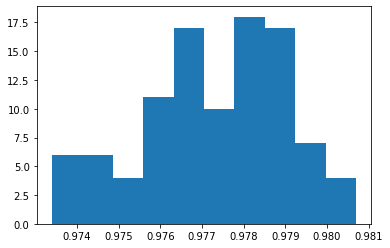

In [80]:
import matplotlib.pyplot as plt
plt.hist(test_error, bins=10)

In [81]:
np.std(test_error)

0.0017371528430164059

In [7]:
0.002**2

4e-06

In [85]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

ModuleNotFoundError: No module named 'gym'